图像的形变与缩放，使用的是 skimage 的 transform 模块，函数比较多，功能齐全。

### 一、改变图片尺寸 resize

函数格式为：

** skimage.transform.resize(image,output_shape) **

- image : 需要改变的尺寸
- output_shpae : 新的图片尺寸

/home/zhaozhao/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


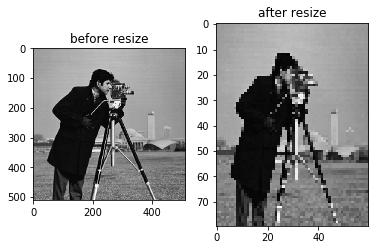

In [2]:
from skimage import transform,data
import matplotlib.pyplot as plt
img=data.camera()
dst=transform.resize(img,(80,60))
plt.figure('resize')

plt.subplot(1,2,1)   #一行两列，共两个子图，此时是第一张图片
plt.title('before resize')
plt.imshow(img,plt.cm.gray)    #返回 img 的灰度图

plt.subplot(1,2,2)  #第二张图
plt.title('after resize')
plt.imshow(dst,plt.cm.gray)    #返回 dst 的灰度图

plt.show()

### 二、按比例缩放 rescale

函数格式为：

** skimage.transform.rescale(image,scale[,...]) **

- scale 参数可以是单个 float 参数，表示缩放的倍数，也可以是一个 float 型的 tuple（元组），如 [0.2,0.5]，表示将行列数分开进行缩放

In [3]:
from skimage import transform,data
img=data.camera()
print(img.shape)   #图片的原始大小
print(transform.rescale(img,0.1).shape)  #缩小为原来图片的0.1倍
print(transform.rescale(img,[0.5,0.25]).shape)  #缩小为原来图片行数一半，列数的四分之一
print(transform.rescale(img,2).shape) #放大为原来图片大小的2倍

(512, 512)
(51, 51)
(256, 128)
(1024, 1024)


/home/zhaozhao/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


### 三、旋转 rotate

函数格式为：

** skimage.transform.rotate(image,angle[,...],resize=False) **

- angle 参数是一个 float 类型数，表示旋转的度数

- resize 用于控制在旋转时，是否改变大小，默认为False

(512, 512)
(512, 512)
(700, 700)


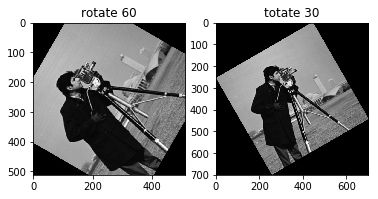

In [4]:
from skimage import transform,data
import matplotlib.pyplot as plt
img=data.camera()
print(img.shape)  #图片的原始大小
img1=transform.rotate(img,60)  #旋转60度，不改变大小
print(img1.shape)
img2=transform.rotate(img,30,resize=True) #旋转30度，同时改变大小
print(img2.shape)

plt.figure('resize')

plt.subplot(1,2,1)
plt.title('rotate 60')
plt.imshow(img1,plt.cm.gray)

plt.subplot(1,2,2)
plt.title('totate 30')
plt.imshow(img2,plt.cm.gray)

plt.show()

### 四、图像金字塔

以多分辨率来解释图像的一种有效但概念简单的结构就是图像金字塔。

图像金字塔最初用于机器视觉和图像压缩，一幅图像的金字塔是一系列以金字塔形状排列的分辨率逐步降低的图像集合。

金字塔的底部是待处理图像的高分辨率表示，而顶部是低分辨率的近似。

当金字塔的上层移动时，尺寸和分辨率就降低。

**高斯金字塔：**

函数原型为：

** skimage.transform.pyramid_gaussian(image,downscale=2) **
- downscale 控制着金字塔的缩放比例

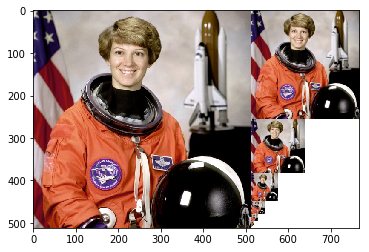

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,transform

image=data.astronaut()  #载入宇航员的图片
rows,cols,dim=image.shape  #获取图片的行数，列数和通道数
pyramid=tuple(transform.pyramid_gaussian(image,downscale=2))
#产生高斯金字塔图像
#一共生成了 log(512)=9 幅金字塔图像，加上原始图像共10幅，pyramid[0]~pyramid[1] 

composite_image=np.ones((rows,int(cols+cols/2),3),dtype=np.double) #生成背景
composite_image[:rows,:cols,:]=pyramid[0]  #融合原始图像

i_row=0
for p in pyramid[1:]:
    n_rows,n_cols=p.shape[:2]
    composite_image[i_row:i_row+n_rows,cols:cols+n_cols]=p  #循环融合9幅金字塔图像
    i_row += n_rows
    
plt.imshow(composite_image)
plt.show()

<img src="images/jinzi.png" style="width:450px;height:350px;">

上面的右图，就是10张金字塔图像，下标为0的表示原始图像，后面每层的图像行和列变为上一层的一半，直至变为1

除了高斯金字塔外，还有其他的金字塔，如：

** skimage.transform.pyramid_laplacian(image,downscale=2)**

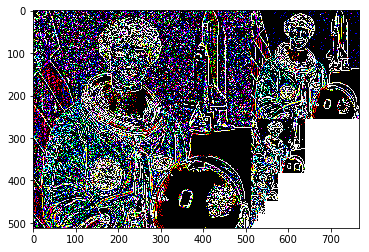

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,transform

image=data.astronaut()  #载入宇航员的图片
rows,cols,dim=image.shape  #获取图片的行数，列数和通道数
pyramid=tuple(transform.pyramid_laplacian(image,downscale=2))
#产生高斯金字塔图像
#一共生成了 log(512)=9 幅金字塔图像，加上原始图像共10幅，pyramid[0]~pyramid[1] 

composite_image=np.ones((rows,int(cols+cols/2),3),dtype=np.double) #生成背景
composite_image[:rows,:cols,:]=pyramid[0]  #融合原始图像

i_row=0
for p in pyramid[1:]:
    n_rows,n_cols=p.shape[:2]
    composite_image[i_row:i_row+n_rows,cols:cols+n_cols]=p  #循环融合9幅金字塔图像
    i_row += n_rows
    
plt.imshow(composite_image)
plt.show()